In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
import os
import tensorflow as tf

In [4]:
PATH = './data/crop/'

In [28]:
random.randint(1,5)

3

In [9]:
def augment(image_path):
    image = cv2.imread(PATH+image_path)
    name = image_path.split(".")[0]
    sizes = random.random(5)
    angles = random.sample(range(0,90),5)
    rotations = []
    flips = []
    for angle in angles:
        image_center = tuple(np.array(image.shape[1::-1]) / 2)
        rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
        result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
        cv2.imwrite(f"data/aug/{name}_{angle}_r.jpg",result)
        rotations.append(result)
        cv2.imwrite(f"data/aug/{name}_{angle}_f.jpg",flipped)
        flips.append(flipped)
    
        
    

In [29]:
def color_distortion(image, s=1.0):
    # image is a tensor with value range in [0, 1].
    # s is the strength of color distortion.

    def color_jitter(x):
        # one can also shuffle the order of following augmentations
        # each time they are applied.
        x = tf.image.random_brightness(x, max_delta=0.8 * s)
        x = tf.image.random_contrast(x, lower=1 - 0.8 * s, upper=1 + 0.8 * s)
        x = tf.image.random_saturation(x, lower=1 - 0.8 * s, upper=1 + 0.8 * s)
        x = tf.image.random_hue(x, max_delta=0.2 * s)
        x = tf.clip_by_value(x, 0, 1)
        return x

    def color_drop(x):
        x = tf.image.rgb_to_grayscale(x)
        x = tf.tile(x, [1, 1, 3])
        return x

    rand_ = tf.random.uniform(shape=(), minval=0, maxval=1)
    # randomly apply transformation with probability p.
    if rand_ < 0.8:
        image = color_jitter(image)

    rand_ = tf.random.uniform(shape=(), minval=0, maxval=1)
    if rand_ < 0.2:
        image = color_drop(image)
    return image

In [35]:
augment("sk.jpg")

In [6]:
list_ = os.listdir(PATH)
for file in list_: 
    augment(file)

In [9]:
image_center = tuple(np.array(image.shape[1::-1]) / 2)
rot_mat = cv2.getRotationMatrix2D(image_center, 70, 1.0)
result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)

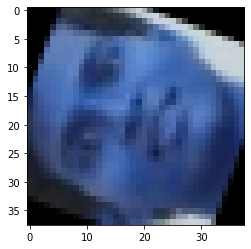

In [10]:
plt.imshow(result)

In [30]:
img = cv2.imread("sk.jpg")

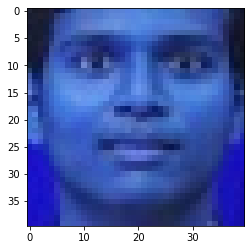

In [54]:
plt.imshow(color_distortion(img))

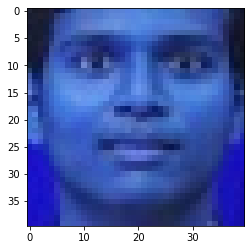

In [33]:
plt.imshow(img)